<a href="https://colab.research.google.com/github/YixinFan11/Machine-Learning/blob/master/Sheet1_backprop_2hidden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heaviside step function $\Theta$ is the derivative of the ReLU activation function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2)

In [3]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [4]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


Define the MLP model

In [28]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_11 = 0.1 * np.random.normal(size=(3,2))
    self.weights_12 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 1
    z_11 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_11)
    # Apply ReLU activation function
    a_11 = np.maximum(z_11, 0)
    # Hidden layer 2
    z_12 = np.matmul(np.hstack((np.ones(shape=(a_11.shape[0], 1)), a_11)), self.weights_12)
    # Apply ReLU activation function
    a_12 = np.maximum(z_12,0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_12.shape[0], 1)), a_12)), self.weights_2)
    # Linear activation 
    a_2 = 1/(1+np.exp(-z_2))
    return z_11, a_11, z_12, a_12, z_2, a_2

Push the true solution through the network and check it gives zero loss

In [29]:
m = MLP()
m.weights_11 = np.array([[0, -1], [1,1], [1,1]], dtype=float)
m.weights_12 = np.array([[1, -1], [0,1], [1,1]], dtype=float)
m.weights_2 = np.array([[4], [-3], [1]], dtype=float)
z_11, a_11, z_12, a_12, z_2, a_2 = m.forward(X)
print(0.25 * np.sum(-Y*np.log(a_2)-(1-Y)*np.log(1-a_2)))

0.6582330607786534


The loss is not zero. It is impossible to get zero loss using sigmoid function as the activation function.

In [9]:
num_epochs = 1000
learning_rate = 0.15

Update random initial weights and biases by back-prop

In [30]:
m = MLP()
loss_history = []
weights_11_history = []
weights_12_history = []
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_11, a_11, z_12, a_12, z_2, a_2 = m.forward(X)
  loss = 0.25 * np.sum(-Y*np.log(a_2)-(1-Y)*np.log(1-a_2))
  loss_history.append(loss)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2 has shape(4, 1), the first dimension being the batch dimension
  delta_2 = 0.5 * (a_2 - Y)
  g_prime_12 = np.heaviside(z_12, 0)
  # Delta_1 has shape (4, 2)
  delta_12 = np.matmul(delta_2, m.weights_2[1:3, :].T) * g_prime_12
  g_prime_11 = np.heaviside(z_11, 0)
  delta_11 = np.matmul(delta_12, m.weights_12[1:3, :].T) * g_prime_11
  # Biases of layers connecting input and hidden layers
  m.weights_11[0, :] -= learning_rate * np.sum(delta_11[:, :], axis=0)
  # Weights of layers connecting input and hidden layers 
  m.weights_11[1:3, :] -= learning_rate * np.matmul(X.T, delta_11)
  # Biases of layers connecting hidden layer 1 and hidden layer 2
  m.weights_12[0, :] -= learning_rate * np.sum(delta_12[:, :], axis=0)
  # Weights of layers connecting hidden layer 1 and hidden layer 2
  m.weights_12[1:3, :] -= learning_rate * np.matmul(a_11.T, delta_12)
  # Biases of layers connecting hidden and output layers
  m.weights_2[0, :] -= learning_rate * np.sum(delta_2[:, :], axis=0)
  # Weights of layers connecting hidden and output layers
  m.weights_2[1:3, :] -= learning_rate * np.matmul(a_12.T, delta_2)
  weights_11_history.append(np.copy(m.weights_11))
  weights_12_history.append(np.copy(m.weights_12))
  weights_2_history.append(np.copy(m.weights_2))
loss_history = np.array(loss_history)
weights_11_history = np.array(weights_11_history)
weights_12_history = np.array(weights_12_history)
weights_2_history = np.array(weights_2_history)

0 0.6935508325434506
100 0.692775670652402
200 0.6900881975582341
300 0.6312383282513307
400 0.07183020032725088
500 0.013902591207597514
600 0.006747388479628177
700 0.004129051647367226
800 0.0028827964721207084
900 0.0021687776026863004


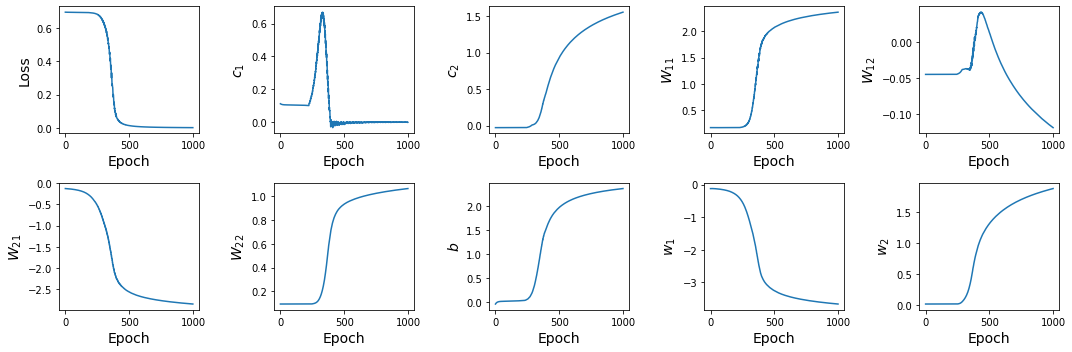

In [35]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 5, 1)
ax.plot(loss_history[:])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax = plt.subplot(2, 5, 2)
ax.plot(weights_12_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_1$', fontsize=14)
ax = plt.subplot(2, 5, 3)
ax.plot(weights_12_history[:,0,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_2$', fontsize=14)
ax = plt.subplot(2, 5, 4)
ax.plot(weights_12_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{11}$', fontsize=14)
ax = plt.subplot(2, 5, 5)
ax.plot(weights_12_history[:,1,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{12}$', fontsize=14)
ax = plt.subplot(2, 5, 6)
ax.plot(weights_12_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{21}$', fontsize=14)
ax = plt.subplot(2, 5, 7)
ax.plot(weights_12_history[:,2,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{22}$', fontsize=14)
ax = plt.subplot(2, 5, 8)
ax.plot(weights_2_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$b$', fontsize=14)
ax = plt.subplot(2, 5, 9)
ax.plot(weights_2_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax = plt.subplot(2, 5, 10)
ax.plot(weights_2_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_2$', fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
print(m.weights_11)

[[ 1.39157869e+00 -4.32752776e-04]
 [-1.39643298e+00 -2.21935330e+00]
 [ 1.43449782e+00  2.21956533e+00]]


In [32]:
print(m.weights_12)

[[-1.94468487e-03  1.55332562e+00]
 [ 2.35977428e+00 -1.18697649e-01]
 [-2.84870552e+00  1.06502948e+00]]


In [33]:
print(m.weights_2)

[[ 2.36699757]
 [-3.66516023]
 [ 1.88346388]]


In [34]:
z_11, a_11, z_12, a_12, z_2, a_2 = m.forward(X)
print(a_2)

[[8.69221465e-04]
 [9.99609109e-01]
 [9.94996643e-01]
 [6.20246032e-04]]
